# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [71]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file =  "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    print("Training data loaded")
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    print("Validation data loaded")
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    print("Testing data loaded")
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Training data loaded
Validation data loaded
Testing data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [16]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


#### Checking how the images are ordered this will be useful during image augmentation

In [5]:
print(y_train[:300])

[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]


Looks like images are ordered in groups, which is great!!

#### Get the labels for each class and store it as a list for later indexing

In [2]:
import pandas as pd

labels_file = pd.read_csv("signnames.csv")
print(labels_file[labels_file["ClassId"] == 2].SignName[2])

Speed limit (50km/h)


In [61]:
labels = np.asarray(labels_file['SignName'])
labels

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

### Visualization of the dataset

Here I have shown the first image from each category of traffic sign along with the name of the sign

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_data(data, labels):
    
    num_of_samples=[]
    plt.figure(figsize=(15, 30))
    for i in range(0, n_classes):
        plt.subplot(15, 4, i+1)
        x_selected = data[labels == i]
        if (data.shape[3] == 3):
            plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
        else:
            plt.imshow(x_selected[0, :, :, :].reshape(32,32), cmap = "gray")
        plt.title(labels_file[labels_file["ClassId"] == i].SignName[i])
        plt.axis('off')
        num_of_samples.append(len(x_selected))
    plt.show()

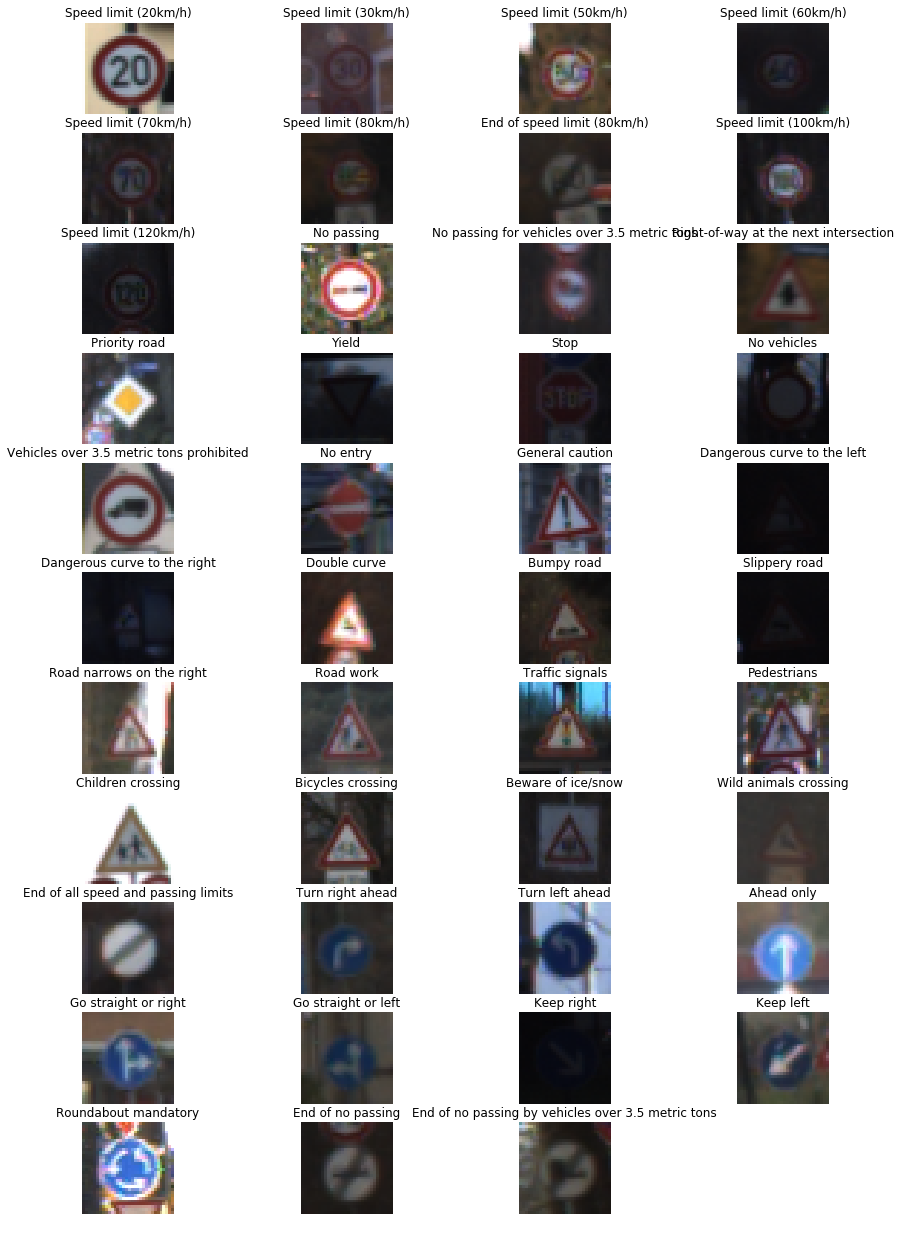

In [5]:
visualize_data(X_train, y_train)

#### This shows the number of examples in each category of traffic sign

we can see that the distribution is not uniform, this can hinder the accuracy of the model. Image augmentation is one way to overcome this problem and I have addressed it in nxt section

<Container object of 43 artists>

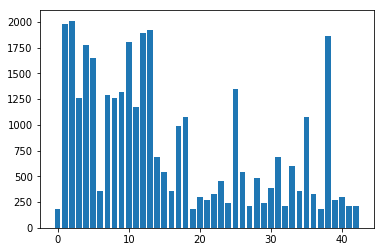

In [266]:
label, count = np.unique(y_train, return_counts = True)
plt.bar(label, count)

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

There are two stages to my preprocessing pipeline:

 * Convert all the images to grayscale
 * Standardize all the images to have mean 0 and standard deviation 1
 
Converting to grayscale is just to make things simple, though we lose information present in the RGB components. 

Standardization helps us to have similar distribution for all the image pixels,The reason we do this is because in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropogate with the gradients to train the model.

We'd like in this process for each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).

In [ ]:
# Standardize images
# I have used training mean and standard deviation for train test and validation set
# reference : https://forums.fast.ai/t/images-normalization/4058/9

image_gray = np.mean(X_train, axis=3, keepdims = True)
train_mean = image_gray.mean()
train_sd = image_gray.std()

In [35]:
def pre_process_image(image, train_mean = train_mean, train_sd = train_sd):
    """
    image : input batch or single image of shape [batch_size, height, width, channels]
    train_mean : training data mean after grayscale conversion
    train_sd : training data sd after grayscale conversion
    
    standardizes given image or batch of image
    """
    image_gray = np.mean(image, axis=3, keepdims = True)
    image_norm = (image_gray - train_mean)/ train_sd
    
    return image_norm

In [ ]:
X_train = pre_process_image(X_train, train_mean, train_sd) 
X_valid = pre_process_image(X_valid, train_mean, train_sd) 
X_test = pre_process_image(X_test, train_mean, train_sd)

### Images after standardization

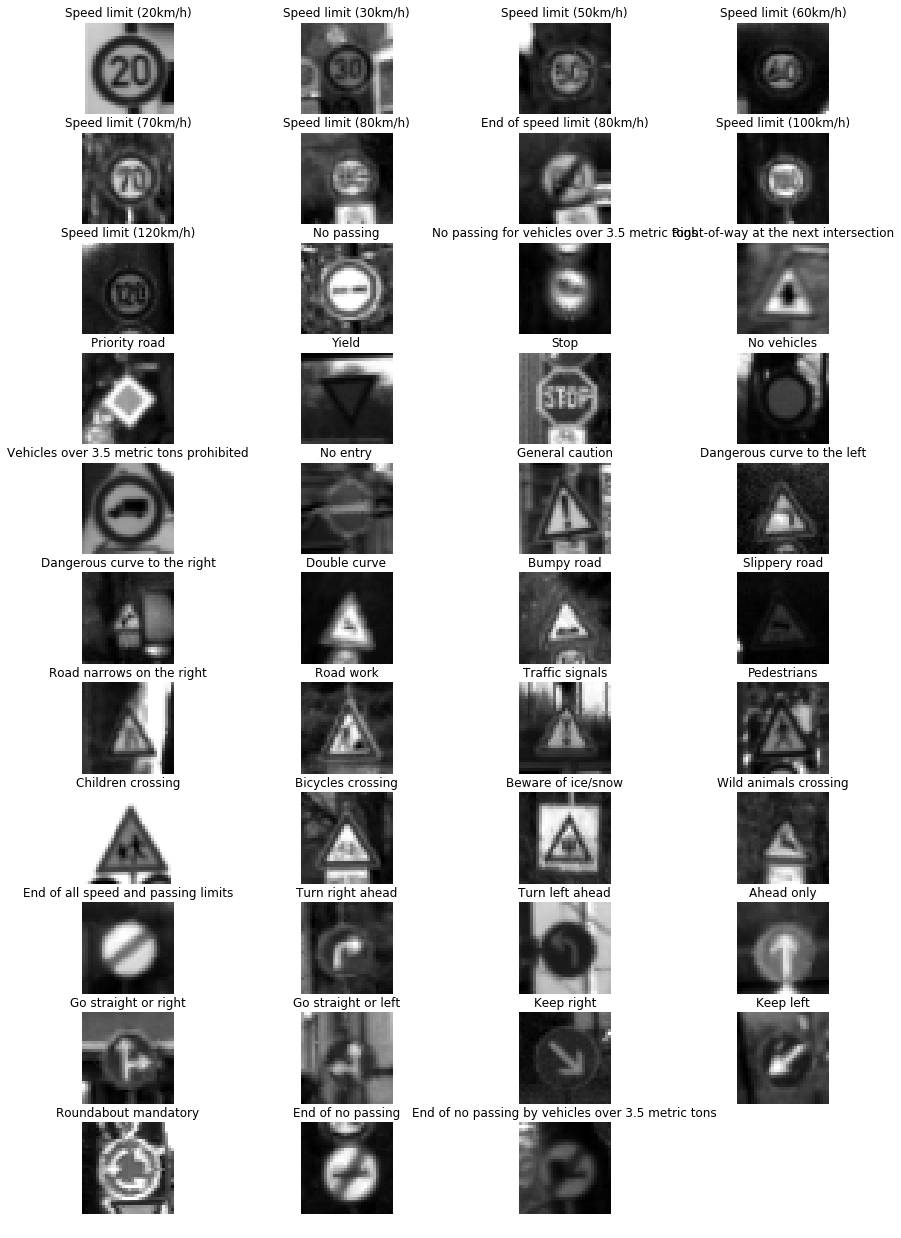

In [14]:
visualize_data(X_train, y_train)

# Data Augmentation

Since we have already seen that distribution of input data is not very uniform so it naturally makes sense to augment data and generate more data for class that has small number of images compared to the rest.

Here I have used three transformations 1. Translation, 2. Rotation, 3. Shear
This is a very basic implementation using opencv, it takes alot of time to run.

In [258]:
import cv2

def translate_img(img):
    """
    Given an input image this function translates it randomly in the range [-3, 7]
    """
    h, w, _ = img.shape
    s1 = (5 * np.random.uniform(-1.0, 1.0)) + 2
    s2 = (5 * np.random.uniform(-1.0, 1.0)) + 2
    #print(s1,s2)
    M = np.array([[1.0, 0.0, s1],
                  [0.0, 1.0, s2]])
    
    dst = cv2.warpAffine(img, M, dsize = (w, h))
    
    return(dst)

def rotate_img(img):
    """
    Given an input image this function rotates it randomly in the range [-30, 30]
    """
    h, w, _ = img.shape
    s = np.random.uniform(-1.0, 1.0) * 30
    if(s == 0):
        s = 30
    M = cv2.getRotationMatrix2D((w/2, h/2), s, 1.2)
    
    dst = cv2.warpAffine(img, M, dsize = (w, h))
    
    return(dst)
    

def shear_img(img):
    """
    Given an input image this function applies shear to it randomly by slightly knocking off basis in the range [-0.2, 0.2]
    """
    h, w, _ = img.shape
    s1 = np.random.uniform(-0.2, 0.2)
    s2 = np.random.uniform(-0.2, 0.2)
    if((s1 == 0.0) & (s2 == 0.0)):
        s1, s2 = 0.2, 0.2
    M = np.array([[1.0, s1, 0.0],
                  [s2, 1.0, 0.0]])
    
    dst = cv2.warpAffine(img, M, dsize = (w, h))
    
    return(dst)

2.3143293583900664 -2.934038175267591


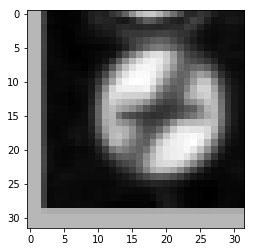

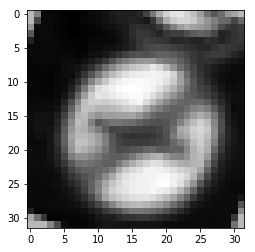

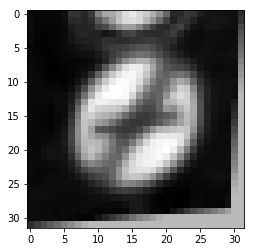

In [257]:
plt.imshow(translate_img(X_train[0]).reshape(32,32), cmap = "gray")
plt.show()
plt.imshow(rotate_img(X_train[0]).reshape(32,32), cmap = "gray")
plt.show()
plt.imshow(shear_img(X_train[0]).reshape(32,32), cmap = "gray")
plt.show()

In [282]:
X_train_aug = X_train
y_train_aug = y_train

#### Here I only have generated data for class with less than 720 data points

Why 720?

Because the minimum number of data point were 180 and I have defined 3 transformations, so I didnot want to use one image twice for augmentation. 180 * 3 transformation to each = 720. and this number though small, but is fairly good for the distribution we have here

In [299]:
max_count = np.max(count)

for class_ in range(0, len(np.unique(y_train))):
    current_class_count = count[class_]
    if current_class_count < 720:
        need = 720 - current_class_count
        indexes = np.where(y_train == class_)[0][:need]
        class_array = np.asarray(class_).reshape([1])
        for index in indexes:
            img = X_train_aug[index]
            
            out1 = translate_img(img)
            out1 = out1.reshape([1, 32, 32, 1])
            
            out2 = rotate_img(img)
            out2 = out2.reshape([1, 32, 32, 1])
            
            out3 = shear_img(img)
            out3 = out3.reshape([1, 32, 32, 1])
            
            # appending to original data
            
            X_train_aug = np.concatenate([X_train_aug, out1, out2, out3])
            y_train_aug = np.concatenate([y_train_aug, class_array, class_array, class_array])

#### Saving the augmented data in format of train, test, valid data for later use

In [342]:
import os

pickle_file = 'Standardized_Augmented_data.pickle'

if not os.path.isfile(pickle_file):

    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train_aug,
                    'y_train': y_train_aug,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data saaved in pickle file.')

Saving data to pickle file...
Data saaved in pickle file.


#### Distribution after data augmentation

<Container object of 43 artists>

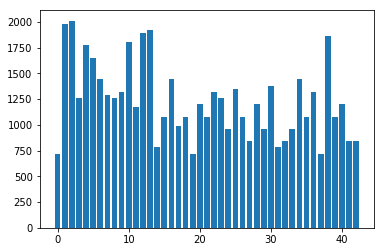

In [302]:
label, count = np.unique(y_train_aug, return_counts = True)
plt.bar(label, count)

In [5]:
with open("Standardized_Augmented_data.pickle", 'rb') as file:
    train = pickle.load(file)
    
X_train, y_train = train['X_train'], train['y_train']

#### Total train images after data augmentation

In [6]:
y_train.shape

(53165,)

### Model Architecture

The network is a 5 layer CNN with last 3 layers being fully connected layers. 

I have used 3 dropout layers, both convolution layer has dropout layer. the reason I have used them is because the data augmentation is not very sophisticated and I did not want the network to overfit.

**The structure of my model looks like this:**
 * Layer 1:
  * convolution (6, 5x5x1 filters) (32x32x1 input) (28x28x6 output - valid padding)
  * ReLU
  * dropout
  * max-pool (28x28x6 input) (14x14x6 output)
  
 * Layer 2:
  * convolution (16, 5x5x6 filters) (14x14x6 input) (10x10x16 output)
  * ReLU
  * max-pool (10x10x16 input) (5x5x16 output)
  
 * Flatten layer (5x5x16 input) (400 output)
 * dropout
 
 * Layer 3:
  * Fully connected layer (400 input) (120 output)
  * ReLU
  
 * Layer 4:
  * Fully connected layer (120 input) (84 ouptput)
  * ReLU
  * dropout
  
 * Layer 5:
  * Fully connected layer (84 input) (43 output)
  



In [7]:
import tensorflow as tf

# hyperparameter
EPOCHS = 70
BATCH_SIZE = 100

In [8]:

from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1,name='convolution0')
    
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2, name='convolution2')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Dropout_01    
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout_02
    fc2 = tf.nn.dropout(fc2, keep_prob)


    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma, name='weights'))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name = "input_x")
y = tf.placeholder(tf.int32, (None), name = "output_y")
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Hyperparameters
 * Batch size = 100
 * Epochs = 70
 * Learning rate = 0.0009
 * dropout probability = 0.5
 * mu = 0
 * sigma = 0.1
 * optimizer = Adam optimizer

In [10]:
rate = 0.0009

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, 
                                                           y: batch_y,
                                                           keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Training

In [11]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print(batch_y)
            sess.run(training_operation, feed_dict={x: batch_x, 
                                                    y: batch_y,
                                                    keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_drop_0.5_3')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.556

EPOCH 2 ...
Validation Accuracy = 0.692

EPOCH 3 ...
Validation Accuracy = 0.753

EPOCH 4 ...
Validation Accuracy = 0.810

EPOCH 5 ...
Validation Accuracy = 0.839

EPOCH 6 ...
Validation Accuracy = 0.812

EPOCH 7 ...
Validation Accuracy = 0.868

EPOCH 8 ...
Validation Accuracy = 0.892

EPOCH 9 ...
Validation Accuracy = 0.884

EPOCH 10 ...
Validation Accuracy = 0.904

EPOCH 11 ...
Validation Accuracy = 0.894

EPOCH 12 ...
Validation Accuracy = 0.881

EPOCH 13 ...
Validation Accuracy = 0.907

EPOCH 14 ...
Validation Accuracy = 0.898

EPOCH 15 ...
Validation Accuracy = 0.887

EPOCH 16 ...
Validation Accuracy = 0.907

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.913

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.914

EPOCH 24 ...
Validation Accura

### Approach to the solution

Most of the time beginners use trial and error method for building NN but if some educated guesses are made then the process of convergence becomes little bit less involved.

As I knew that the training data was adequate enough for this task, I did not use any 1x1 convolution. I used 3 dropout layers to make sure that my model does not overfit, which can be infereed from **validation accuracy = 0.943 and test accuracy = 0.932** which are pretty close.

The learning rate and batch size was a bit trail and error, as I increased LR to 0.009 or decreased to 0.00075 the learning did not happen. Accuracy was 0.013 to 0.24. so then I came to middle groung of 0.0009 and it worked.

Though I also want to point out that LR of 0.009 and batch size of 128 gave accuracy of about 90% but it was only with one dropout layer at the 4th layer. 

# Test Accuracy

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_drop_0.5_3.meta')
    saver.restore(sess, "./lenet_drop_0.5_3")
    test_accuracy = evaluate(X_test, y_test)
    print("test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_drop_0.5_3
test Accuracy = 0.932


### Test accuracy is 93.2% and validation accuracy is 94.3%

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./test_images/3.jpg
./test_images/6.jpg
./test_images/5.jpg
./test_images/4.jpg
./test_images/2.jpg
./test_images/1.jpg


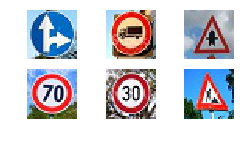

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2

images = glob.glob('./test_images/*')

test_images = []
plt.figure(figsize=(4, 2))
i = 1

for image in images:
    print(image)
    temp = cv2.imread(image)
    test_images.append(temp)
    plt.subplot(2, 3, i)
    i += 1
    plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

test_images = np.asarray(test_images)

### Quality of data

I did not directly get the 32x32 images so these are the downsampled version of original images with varying aspect ratio.

While all images looks clean the last two images are particularly interesting, When I converted these to grayscale, second last image almost looks like a gaussian noise and it is interesting to notice when tested it not only recognized it correctly but the top 5 predictions, not surprisingly were all speed limits

**'Speed limit (30km/h)',<br>
  'Speed limit (20km/h)',<br>
  'Speed limit (50km/h)',<br> 
  'Speed limit (80km/h)',<br>
  'Speed limit (70km/h)'**

### Preprocessing test images taken from web

In [50]:
test_images = pre_process_image(test_images)

### Analyze Performance

In [70]:
test_labels = [36, 16, 11, 4, 1, 25]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_drop_0.5_3.meta')
    saver.restore(sess, "./lenet_drop_0.5_3")
    test_accuracy = evaluate(test_images, test_labels)
    print("test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_drop_0.5_3
test Accuracy = 1.000


#### The model was able to detect all the images correctlywith 100% accuracy

Looking at the test accuracy of 93.2, I can say that clean nature of the input images might be of advantage here, but the model also was able to correctly identify last two images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:
softmax_logits = tf.nn.softmax(logits)
top_k_pred = tf.nn.top_k(softmax_logits, k = 5)

def predict(images):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.import_meta_graph('./lenet_drop_0.5_3.meta')
        saver.restore(sess, "./lenet_drop_0.5_3")
        
        softmax_prob = sess.run(softmax_logits, feed_dict={x: images, keep_prob: 1.})
        top_k_prob = sess.run(top_k_pred, feed_dict = {x: images, keep_prob: 1.})
        
        return(top_k_prob)

In [51]:
predictions = predict(test_images)
predictions

INFO:tensorflow:Restoring parameters from ./lenet_drop_0.5_3


TopKV2(values=array([[  9.99847174e-01,   1.49262894e-04,   1.93931714e-06,
          9.07360743e-07,   4.53943755e-07],
       [  9.99999166e-01,   6.26299823e-07,   1.69819387e-07,
          4.52673525e-08,   1.93721963e-08],
       [  9.85366583e-01,   1.38993151e-02,   5.38797176e-04,
          1.67260398e-04,   1.98927955e-05],
       [  9.87542868e-01,   1.18966345e-02,   5.39224828e-04,
          7.47958256e-06,   6.62649245e-06],
       [  9.99755085e-01,   2.15857915e-04,   2.68614276e-05,
          2.10332178e-06,   3.90886790e-08],
       [  9.48514044e-01,   4.98284027e-02,   1.49624399e-03,
          5.88249641e-05,   3.39199541e-05]], dtype=float32), indices=array([[36, 37, 35, 40, 20],
       [16, 41,  9, 32, 33],
       [11, 30, 21, 28, 27],
       [ 4,  0,  1, 14,  8],
       [ 1,  0,  2,  5,  4],
       [25, 24, 29, 30, 27]], dtype=int32))

In [67]:
labels[predictions[1].ravel()].reshape(predictions[1].shape)

array([['Go straight or right', 'Go straight or left', 'Ahead only',
        'Roundabout mandatory', 'Dangerous curve to the right'],
       ['Vehicles over 3.5 metric tons prohibited', 'End of no passing',
        'No passing', 'End of all speed and passing limits',
        'Turn right ahead'],
       ['Right-of-way at the next intersection', 'Beware of ice/snow',
        'Double curve', 'Children crossing', 'Pedestrians'],
       ['Speed limit (70km/h)', 'Speed limit (20km/h)',
        'Speed limit (30km/h)', 'Stop', 'Speed limit (120km/h)'],
       ['Speed limit (30km/h)', 'Speed limit (20km/h)',
        'Speed limit (50km/h)', 'Speed limit (80km/h)',
        'Speed limit (70km/h)'],
       ['Road work', 'Road narrows on the right', 'Bicycles crossing',
        'Beware of ice/snow', 'Pedestrians']], dtype=object)

### A quick look at the predictions reveal the robustness of the model 
 * Predictions apart from top one are of very similar type not varying too much
 * for example for speed limit input all the predictions are about speed limit
 * for prohibited entries all the predictions are similar kind - prohibition
 * this is due to the dropout regularization and global standardization of train test and validation data set.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")